In [1]:
import pandas as pd
import re
import time
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
from stat import ST_MTIME

%matplotlib inline

In [ ]:
def graph_loss(filename):
    with open(filename, 'r') as f:
        losses = []
        lines = [line.strip() for line in f.readlines()]
        last_epoch = 0
        last_loss = 0.0
        for line in lines[:4]:
            matches = re.match('Loaded checkpoint from epoch (\d+). Best loss so far is (\d.\d\d\d).', line)
            if matches:
                last_epoch = matches.group(1)
                last_loss = matches.group(2)
        
        for line in lines[5:]:
            matches = re.match('^\* LOSS - (\d.\d\d\d)', line)
            if matches:
                losses.append({'loss': matches.group(1)})
        df = pd.DataFrame(losses, dtype=float)
        print(df.describe())
        print()
        print('Start Epoch: {}, Start Loss: {}'.format(last_epoch, last_loss))

        df['min'] = df.loss.min()
        df['start'] = float(last_loss)
        df['first'] = float(losses[0]['loss'])
        print('Min Loss: {} Index: {} Last: {}'.format(
                    df.loss.min(), df.loss.idxmin(), losses[-1]['loss']))
        return (len(losses), df)

             loss
count  274.000000
mean     0.921135
std      0.013422
min      0.902000
25%      0.912000
50%      0.917000
75%      0.925750
max      0.990000

Start Epoch: 926, Start Loss: 0.970
Min Loss: 0.902 Index: 238 Last: 0.908


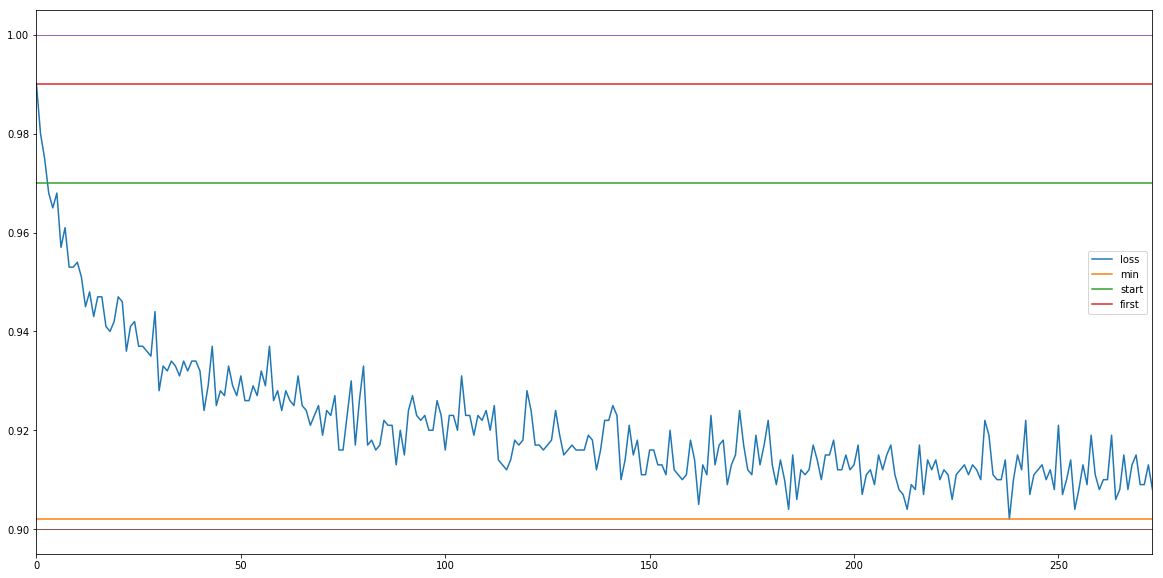

In [ ]:
prev_num = 0
n = 1
i = 0
prev_mtime = 0
while True:
    i += 1
    st = os.stat('train.log')
    mtime = st[ST_MTIME]
    if mtime == prev_mtime:
        if prev_num == num_loss:
            if i == n:
                break
        time.sleep(60)
        continue

    clear_output(wait=True)
    num_loss, df = graph_loss('train.log')
    df.plot(figsize=(20, 10))
    plt.plot(range(df.shape[0]), [1]*df.shape[0], '_')
    plt.plot(range(df.shape[0]), [0.9]*df.shape[0], '_')
    plt.show() 


    if prev_num == num_loss:
        if i == n:
            break
    else:
        i = 0

    prev_mtime = mtime
    prev_num = num_loss
    time.sleep(60)